In [8]:
from tensorflow.keras.models import load_model
model = load_model('.\\checkpoint\\checkpoint873.ckpt')  
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 256, 256, 4)       112       
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 128, 128, 4)      0         
 g2D)                                                            
                                                                 
 dropout_42 (Dropout)        (None, 128, 128, 4)       0         
                                                                 
 conv2d_43 (Conv2D)          (None, 128, 128, 4)       148       
                                                                 
 max_pooling2d_43 (MaxPoolin  (None, 64, 64, 4)        0         
 g2D)                                                            
                                                                 
 dropout_43 (Dropout)        (None, 64, 64, 4)        

In [9]:
#参数
image_shape=(256,256,3)
batch_size=54 #查看显卡信息：nvidia-smi

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
train_dir='.\\dataset\\train'
train_generator = train_datagen.flow_from_directory(
                                                    train_dir,
                                                    target_size=(image_shape[0], image_shape[1]),
                                                    batch_size=batch_size,
                                                    class_mode='binary')
print('train_generator.class_indices=',train_generator.class_indices) #train_generator.class_indices= {'stable': 0, 'unstable': 1}



validation_datagen = ImageDataGenerator(rescale=1./255)
validation_dir='.\\dataset\\validation'
validation_generator = validation_datagen.flow_from_directory(
                                                    validation_dir,
                                                    target_size=(image_shape[0], image_shape[1]),
                                                    batch_size=batch_size,
                                                    class_mode='binary')
print('validation_generator.class_indices=',validation_generator.class_indices) 

Found 8748 images belonging to 2 classes.
train_generator.class_indices= {'stable': 0, 'unstable': 1}
Found 4374 images belonging to 2 classes.
validation_generator.class_indices= {'stable': 0, 'unstable': 1}


In [11]:
predict_datagen = ImageDataGenerator(rescale=1./255)
predict_dir='.\\model.predict1'
predict_generator = predict_datagen.flow_from_directory(
                                                    predict_dir,
                                                    target_size=(image_shape[0], image_shape[1]),
                                                    batch_size=batch_size,
                                                    #class_mode='binary'
                                                    )
print(model.predict(predict_generator))


predict_datagen = ImageDataGenerator(rescale=1./255)
predict_dir='.\\model.predict2'
predict_generator = predict_datagen.flow_from_directory(
                                                    predict_dir,
                                                    target_size=(image_shape[0], image_shape[1]),
                                                    batch_size=batch_size,
                                                    #class_mode='binary'
                                                    )
print(model.predict(predict_generator))


Found 6 images belonging to 1 classes.
1/1 [==============================] - 3s 3s/step
[[0.00222806]
 [0.00281447]
 [0.00084596]
 [0.0019366 ]
 [0.00911619]
 [0.00334958]]
Found 4 images belonging to 1 classes.
1/1 [==============================] - 0s 231ms/step
[[0.99999595]
 [0.9972362 ]
 [0.99839884]
 [0.9999975 ]]


In [12]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_dir='.\\dataset\\test'
test_generator = test_datagen.flow_from_directory(
                                                    test_dir,
                                                    target_size=(image_shape[0], image_shape[1]),
                                                    batch_size=batch_size,
                                                    class_mode='binary')
print('test_generator.class_indices=',test_generator.class_indices) 

test_loss, test_acc = model.evaluate(test_generator)
print('test_acc=',test_acc)


validation_loss, validation_acc = model.evaluate(validation_generator)
print('validation_acc=',validation_acc)

train_loss, train_acc = model.evaluate(train_generator)
print('train_acc=',train_acc)


Found 4374 images belonging to 2 classes.
test_generator.class_indices= {'stable': 0, 'unstable': 1}
81/81 [==============================] - 57s 708ms/step - loss: 0.0070 - acc: 1.0000
test_acc= 1.0
81/81 [==============================] - 33s 416ms/step - loss: 0.0074 - acc: 1.0000
validation_acc= 1.0
162/162 [==============================] - 128s 794ms/step - loss: 0.0060 - acc: 1.0000
train_acc= 1.0


In [13]:
extra_test_datagen = ImageDataGenerator(rescale=1./255)
extra_test_dir='.\\dataset\\extra_test'
extra_test_generator = extra_test_datagen.flow_from_directory(
                                                    extra_test_dir,
                                                    target_size=(image_shape[0], image_shape[1]),
                                                    batch_size=batch_size,
                                                    class_mode='binary')
print('extra_test_generator.class_indices=',extra_test_generator.class_indices) 

extra_test_loss, extra_test_acc = model.evaluate(extra_test_generator)
print('extra_test_acc=',extra_test_acc) 

Found 7290 images belonging to 2 classes.
extra_test_generator.class_indices= {'stable': 0, 'unstable': 1}
135/135 [==============================] - 105s 784ms/step - loss: 0.1603 - acc: 0.9366
extra_test_acc= 0.9366255402565002


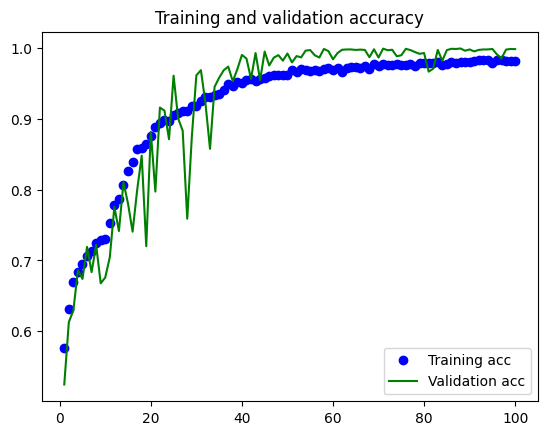

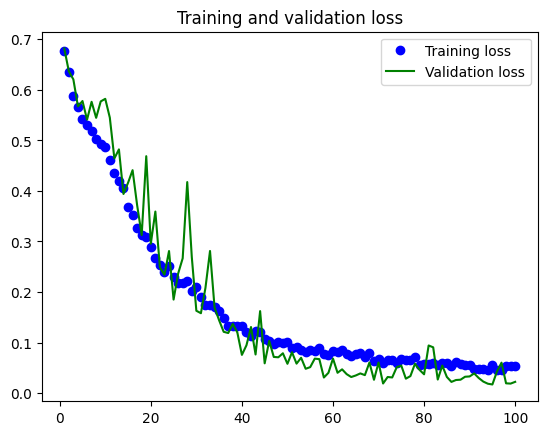

In [14]:
import matplotlib.pyplot as plt

with open('history.txt') as file_object:
    history=file_object.read()
history=eval(history) #将字符串转换为字典

acc = history['acc']
val_acc = history['val_acc']
loss = history['loss']
val_loss = history['val_loss']
epochs = range(1, len(acc) + 1)
a=0
b=100
plt.plot(epochs[a:b], acc[a:b], 'bo', label='Training acc')
plt.plot(epochs[a:b], val_acc[a:b], 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs[a:b], loss[a:b], 'bo', label='Training loss')
plt.plot(epochs[a:b], val_loss[a:b], 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()